In [1]:
#suppress warnings about class imbalances
import warnings
warnings.filterwarnings("ignore")

#install and import packages
!pip install --upgrade scikit-learn
!pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import models, packages
import sklearn
from sklearn import linear_model, ensemble, neural_network
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
import numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 23.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
#print python version for report
!python ‐‐version
import sys; print(sys.version)

python3: can't open file '/content/‐‐version': [Errno 2] No such file or directory
3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [3]:
#read and display data
data = pd.read_csv("/content/winequality-red.csv", sep = ";")

In [4]:
#split into features/target
x = data.drop(columns = ['quality'])
#attempted normalization at one point but this step yielded lower performance
#x_norm = sklearn.preprocessing.normalize(x, axis=0)
y = data['quality']

In [5]:
#function to report relevant metrics
def return_metrics(y_test, y_pred):
  from sklearn import metrics
  print("Accuracy", metrics.accuracy_score(y_test, y_pred))
  print("Balanced Accuracy", metrics.balanced_accuracy_score(y_test, y_pred))
  return metrics.balanced_accuracy_score(y_test, y_pred)

In [8]:
#models to compare
models = [linear_model.RidgeClassifier(), ensemble.AdaBoostClassifier(), ensemble.BaggingClassifier(), ensemble.RandomForestClassifier(), linear_model.LogisticRegression(), linear_model.Perceptron(), linear_model.SGDClassifier(), neural_network.MLPClassifier(420, 'relu',)]
model_names = ["Ridge Classifier", "AdaBoost Classifier", "Bagging Classifier",
               "RandomForest Classifier", "Logistic Regression Classifier",
               "Perceptron Classifier", "SGD Classifier", "MLP Classifier"]

max_score = 0
max_index = 0

best_y_pred = None
best_y_test = None

#compare models
for i in range(len(models)):
  y_preds = []
  y_tests = []
  #five trials for each
  for j in range(0, 5):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
      x, y, test_size=0.2, random_state=j)
    m = models[i]
    #10-fold cross-validation to determine best parameters
    scores = sklearn.model_selection.cross_validate(m, x_train, y_train, cv=10, scoring = "balanced_accuracy", return_estimator=True)
    best = list(scores["test_score"]).index(max(scores["test_score"]))
    best_model = scores["estimator"][best]
    y_pred = best_model.predict(x_test)
    y_preds.extend(y_pred)
    y_tests.extend(y_test)
  print(models[i])
  model_metrics = return_metrics(y_tests, y_preds)
  if model_metrics > max_score:
    max_score = model_metrics
    max_index = i
    best_y_pred = y_preds
    best_y_test = y_tests
#print name of best model
print(max_score, model_names[max_index])

RidgeClassifier()
Accuracy 0.591875
Balanced Accuracy 0.23308138416893923
AdaBoostClassifier()
Accuracy 0.524375
Balanced Accuracy 0.28976234950661617
BaggingClassifier()
Accuracy 0.67875
Balanced Accuracy 0.37721995934372843
RandomForestClassifier()
Accuracy 0.70625
Balanced Accuracy 0.3695238706292412
LogisticRegression()
Accuracy 0.60375
Balanced Accuracy 0.24282387698104202
Perceptron()
Accuracy 0.420625
Balanced Accuracy 0.25139966045155215
SGDClassifier()
Accuracy 0.33125
Balanced Accuracy 0.24626942737447402
MLPClassifier(hidden_layer_sizes=420)
Accuracy 0.58875
Balanced Accuracy 0.2957317618677427
0.37721995934372843 Bagging Classifier


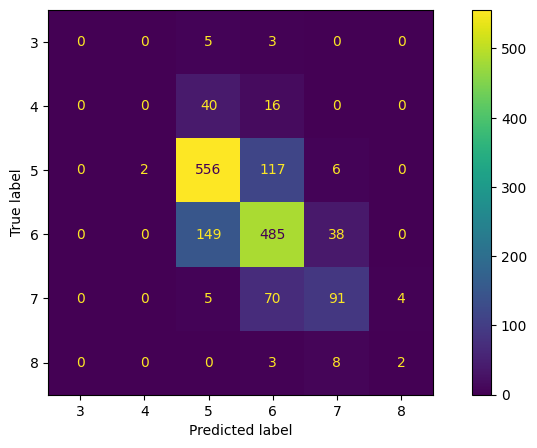

In [7]:
#plot confusion matrix to visualize true/false positives/negatives among classes
fig, ax = plt.subplots(figsize=(10, 5))
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(best_y_test, best_y_pred, ax=ax)